Input gender (M, F): F
Input age (1, 18, 25, 35, 45, 50, 56): 56


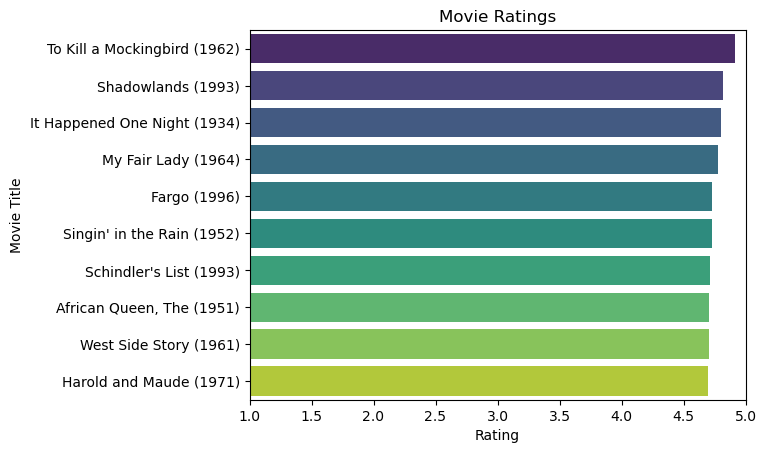

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reads movies.dat
moviesDf = pd.read_table('movies.dat', 
                        sep = '::', 
                        header = None, 
                        names = ['MovieID', 'Title', 'Genres'], 
                        engine = 'python',
                        encoding = 'cp1252')

# Reads ratings.dat
ratingsDf = pd.read_table('ratings.dat', 
                         sep = '::', 
                         header = None, 
                         names = ['UserID', 'MovieID', 'Rating', 'Timestamp'], 
                         engine = 'python')

# Reads users.dat
usersDf = pd.read_table('users.dat', 
                       sep = '::', 
                       header = None, 
                       names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], 
                       engine = 'python')

# Merges raiting and movie tables by MovieID
halfMergedDf = ratingsDf.merge(moviesDf, on = 'MovieID')

# Merges last merged and user tables by UserID
mergedDf = halfMergedDf.merge(usersDf, on = 'UserID')

def customInput(text, valuesToInput = []):
    if not bool(valuesToInput):
        return input(text)
    else:
        while(True):
            value = input(text)

            if valuesToInput.count(value) > 0:
                return value

# Retrieves top 10 movies
def getTopMovies(gender, age) :
    # Movies selected by users of a certain gender and age
    filteredDf = mergedDf[(mergedDf['Gender'] == gender) & (mergedDf['Age'] == age)]

    # Calculates the average rating
    groupedDf = filteredDf.groupby('Title')
    averageRatingsDf = groupedDf['Rating'].mean()

    # Filters groups with more than 10 ratings
    filteredRatingsDf = averageRatingsDf[groupedDf['Rating'].count() >= 10]

    # Sorts by average rating in descending order
    sortedRatingsDf = filteredRatingsDf.sort_values(ascending = False)

    # Step 6: Select the top 10 movies
    topMovies = sortedRatingsDf.head(10)

    return topMovies


def showGraph(ratingsToVisualize):
    # Build graph
    sns.barplot(x = ratingsToVisualize, y = ratingsToVisualize.index, palette="viridis")
    plt.xlim(1, 5)

    # Titles
    plt.title('Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Movie Title')

    plt.show()

gender = customInput('Input gender (M, F): ', 
                        ['M', 'F'])
age = int(customInput('Input age (1, 18, 25, 35, 45, 50, 56): ', 
                         ['1', '18', '25', '35', '45', '50', '56']))

ratingsToVisualize = getTopMovies(gender, age)

showGraph(ratingsToVisualize)